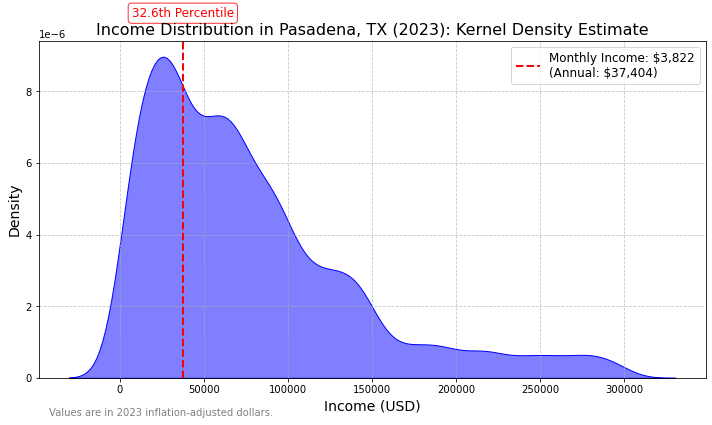

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define income ranges and percentages
income_ranges = [
    (0, 10000),        # Less than $10,000
    (10000, 14999),    # $10,000 to $14,999
    (15000, 24999),    # $15,000 to $24,999
    (25000, 34999),    # $25,000 to $34,999
    (35000, 49999),    # $35,000 to $49,999
    (50000, 74999),    # $50,000 to $74,999
    (75000, 99999),    # $75,000 to $99,999
    (100000, 149999),  # $100,000 to $149,999
    (150000, 199999),  # $150,000 to $199,999
    (200000, 300000)   # $200,000 or more (capped at $300,000)
]
percentages = [6.2, 5.8, 8.0, 11.1, 9.6, 19.2, 13.6, 15.4, 4.7, 6.5]

# Generate synthetic income data
np.random.seed(123)  # For reproducibility
n = 10000  # Number of data points to simulate
income_data = []

for i, (low, high) in enumerate(income_ranges):
    size = int(n * percentages[i] / 100)
    income_data.extend(np.random.uniform(low, high, size))

income_data = np.array(income_data)

# Calculate annual income for $3,117 per month
target_income = 3117 * 12  # Annual income

# Calculate percentile of target income
percentile = np.mean(income_data <= target_income) * 100

# Plot the KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(income_data, fill=True, color="blue", alpha=0.5)
plt.axvline(target_income, color="red", linestyle="--", linewidth=2, label=f"Monthly Income: $3,822\n(Annual: ${target_income:,.0f})")
plt.title("Income Distribution in Pasadena, TX (2023): Kernel Density Estimate", fontsize=16)
plt.xlabel("Income (USD)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)

# Add text for percentile
plt.text(
    target_income, 0.00001, 
    f"{percentile:.1f}th Percentile", 
    color="red", fontsize=12, ha="center", va="bottom",
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="white", alpha=0.8)
)

# Add footnote
plt.annotate(
    "Values are in 2023 inflation-adjusted dollars.",
    xy=(0, 0), xycoords='axes fraction',
    fontsize=10, ha='left', va='top', color='gray',
    xytext=(10, -30), textcoords='offset points'
)

# Add legend
plt.legend(fontsize=12, loc="upper right")

plt.tight_layout()
plt.show()
